# Exploratory Data Analysis (EDA) and Preprocessing
## Dataset: Prosper Loan Data

This notebook presents the initial phase of the Credit Risk Audit project.  
We perform an exploratory analysis and data preprocessing with the following goals:

- **Objective**: Prepare the data for building credit default prediction models and subsequent auditing.
- **Target variable**: We will focus on predicting the loan status, identifying defaults or delinquency risk.
- **Planned models**: Logistic Regression, Random Forest, and Gradient Boosting (XGBoost).
- **Downstream auditing**: Once the models are trained, we will audit their behavior using explainability (SHAP, LIME) and robustness techniques (adversarial perturbations).

The exploratory analysis aims to:

- Understand the structure and quality of the data.
- Handle missing values systematically.
- Detect and evaluate outliers.
- Identify variables that are not useful or could cause information leakage (e.g., post-loan variables).
- Prepare a clean and reliable dataset for modeling.

---

The dataset consists of 113,937 loans and 81 variables, including borrower characteristics, loan information, credit attributes, and historical payment performance.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
## 1. Imports and Setup
import sys
import os

# Add the project root to the Python path
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
from audit_tool import preprocessing as pp

# Settings
pd.set_option('display.max_columns', None)

In [3]:
## Load the preprocessed Prosper Loan dataset

file_path = '../data/raw/prosper_loan_data.csv'

df = pp.load_data(file_path)

print(f"Dataset loaded successfully with shape: {df.shape}")

Dataset loaded successfully with shape: (113937, 81)


## 1. Dataset Overview

Let's review the structure and basic statistics of the dataset.

### Dataset Dictionary
| Variable | Description |
|:---|:---|
| ListingKey | Unique key for each listing. |
| ListingNumber | Public unique number identifying the listing. |
| ListingCreationDate | Date when the listing was created. |
| CreditGrade | Credit rating at listing (pre-2009 listings). |
| Term | Length of the loan in months. |
| LoanStatus | Current status of the loan. |
| ClosedDate | Date the loan was closed (if applicable). |
| BorrowerAPR | Borrower's Annual Percentage Rate. |
| BorrowerRate | Borrower's interest rate. |
| LenderYield | Lender's yield on the loan after service fee. |
| EstimatedEffectiveYield | Effective yield estimation (after late fees and defaults). |
| EstimatedLoss | Estimated principal loss on defaults. |
| EstimatedReturn | Estimated return (Effective Yield - Loss Rate). |
| ProsperRating (numeric) | Numeric Prosper Rating at origination. |
| ProsperRating (Alpha) | Alphabetic Prosper Rating at origination. |
| ProsperScore | Custom risk score (1-10) based on Prosper data. |
| ListingCategory | Purpose selected for the loan. |
| BorrowerState | Borrower's state abbreviation. |
| Occupation | Borrower's stated occupation. |
| EmploymentStatus | Borrower's employment status. |
| EmploymentStatusDuration | Length of current employment status (months). |
| IsBorrowerHomeowner | Whether the borrower owns a home. |
| CurrentlyInGroup | Whether the borrower was in a group. |
| GroupKey | Key of the group borrower belongs to (if any). |
| DateCreditPulled | Date when the credit report was pulled. |
| CreditScoreRangeLower | Lower bound of borrower's credit score. |
| CreditScoreRangeUpper | Upper bound of borrower's credit score. |
| FirstRecordedCreditLine | Date of first recorded credit line. |
| CurrentCreditLines | Number of active credit lines. |
| OpenCreditLines | Number of open credit lines. |
| TotalCreditLinespast7years | Total credit lines opened in the last 7 years. |
| OpenRevolvingAccounts | Number of open revolving accounts. |
| OpenRevolvingMonthlyPayment | Monthly payment for revolving accounts. |
| InquiriesLast6Months | Number of credit inquiries in the last 6 months. |
| TotalInquiries | Total number of inquiries. |
| CurrentDelinquencies | Current number of delinquent accounts. |
| AmountDelinquent | Total dollars delinquent. |
| DelinquenciesLast7Years | Number of delinquencies over the last 7 years. |
| PublicRecordsLast10Years | Number of public records in the last 10 years. |
| PublicRecordsLast12Months | Number of public records in the last 12 months. |
| RevolvingCreditBalance | Total balance on revolving credit accounts. |
| BankcardUtilization | Utilization percentage of bankcard credit. |
| AvailableBankcardCredit | Available credit on bankcards. |
| TotalTrades | Total number of trade lines opened. |
| TradesNeverDelinquent | Number of trades with no delinquencies. |
| TradesOpenedLast6Months | Number of trades opened in the last 6 months. |
| DebtToIncomeRatio | Debt-to-income ratio (capped at 10.01). |
| IncomeRange | Income range category. |
| IncomeVerifiable | Whether borrower can verify income. |
| StatedMonthlyIncome | Monthly income stated by the borrower. |
| LoanKey | Unique key associated with the loan. |
| TotalProsperLoans | Number of Prosper loans the borrower has. |
| TotalProsperPaymentsBilled | Number of payments billed on Prosper loans. |
| OnTimeProsperPayments | Number of on-time payments on Prosper loans. |
| ProsperPaymentsLessThanOneMonthLate | Payments less than one month late. |
| ProsperPaymentsOneMonthPlusLate | Payments more than one month late. |
| ProsperPrincipalBorrowed | Principal amount borrowed on Prosper loans. |
| ProsperPrincipalOutstanding | Principal amount outstanding on Prosper loans. |
| ScorexChangeAtTimeOfListing | Change in credit score compared to prior Prosper loan. |
| LoanCurrentDaysDelinquent | Number of days loan is delinquent. |
| LoanFirstDefaultedCycleNumber | Loan cycle at which default occurred. |
| LoanMonthsSinceOrigination | Months since loan origination. |
| LoanNumber | Unique loan ID. |
| LoanOriginalAmount | Amount originally borrowed. |
| LoanOriginationDate | Date the loan was originated. |
| LoanOriginationQuarter | Quarter of loan origination. |
| MemberKey | Unique borrower key. |
| MonthlyLoanPayment | Scheduled monthly payment amount. |
| LP_CustomerPayments | Cumulative gross payments pre-charge-off. |
| LP_CustomerPrincipalPayments | Cumulative principal payments pre-charge-off. |
| LP_InterestandFees | Cumulative interest and fees paid pre-charge-off. |
| LP_ServiceFees | Service fees paid by investors. |
| LP_CollectionFees | Collection fees paid by investors. |
| LP_GrossPrincipalLoss | Gross principal charged-off amount. |
| LP_NetPrincipalLoss | Net uncollected principal after recoveries. |
| LP_NonPrincipalRecoverypayments | Recovery payments for fees and interest. |
| PercentFunded | Percentage of loan funded. |
| Recommendations | Number of borrower recommendations. |
| InvestmentFromFriendsCount | Number of friends who invested. |
| InvestmentFromFriendsAmount | Amount invested by friends. |
| Investors | Number of investors who funded the loan. |

In [4]:
## Quick overview: structure, types, basic statistics
pp.overview_data(df)


Data Overview
----------------------------------------
Shape: (113937, 81)

Dataset Info:
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield    

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,CreditScoreRangeLower,CreditScoreRangeUpper,CurrentCreditLines,OpenCreditLines,TotalCreditLinespast7years,OpenRevolvingAccounts,OpenRevolvingMonthlyPayment,InquiriesLast6Months,TotalInquiries,CurrentDelinquencies,AmountDelinquent,DelinquenciesLast7Years,PublicRecordsLast10Years,PublicRecordsLast12Months,RevolvingCreditBalance,BankcardUtilization,AvailableBankcardCredit,TotalTrades,TradesNeverDelinquent (percentage),TradesOpenedLast6Months,DebtToIncomeRatio,StatedMonthlyIncome,TotalProsperLoans,TotalProsperPaymentsBilled,OnTimeProsperPayments,ProsperPaymentsLessThanOneMonthLate,ProsperPaymentsOneMonthPlusLate,ProsperPrincipalBorrowed,ProsperPrincipalOutstanding,ScorexChangeAtTimeOfListing,LoanCurrentDaysDelinquent,LoanFirstDefaultedCycleNumber,LoanMonthsSinceOrigination,LoanNumber,LoanOriginalAmount,MonthlyLoanPayment,LP_CustomerPayments,LP_CustomerPrincipalPayments,LP_InterestandFees,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,113937.000000,106312.000000,113346.000000,113346.000000,106333.000000,106333.000000,113240.000000,113937.00000,113937.000000,113240.000000,112778.000000,113240.000000,106315.000000,112947.000000,113240.000000,106333.000000,1.063330e+05,106333.000000,106393.000000,106393.000000,106393.000000,106393.000000,105383.000000,1.139370e+05,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,22085.000000,18928.000000,113937.000000,16952.000000,113937.000000,113937.000000,113937.00000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,2.774209,96.071582,685.567731,704.567731,10.317192,9.260164,26.754539,6.96979,398.292161,1.435085,5.584405,0.592052,984.507059,4.154984,0.312646,0.015094,1.759871e+04,0.561309,11210.225447,23.230034,0.885897,0.802327,0.275947,5.608026e+03,1.421100,22.934345,22.271949,0.613629,0.048540,8472.311961,2930.313906,-3.223214,152.816539,16.268464,31.896882,69444.474271,8337.01385,272.475783,4183.079489,3105.536588,1077.542901,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,3.996797,94.480605,66.458275,66.458275,5.457866,5.022644,13.637871,4.63097,447.159711,2.437507,6.429946,1.978707,7158.270157,10.160216,0.727868,0.154092,3.293640e+04,0.317918,19818.361309,11.871311,0.148179,1.097637,0.551759,7.478497e+03,0.764042,19.249584,18.830425,2.446827,0.556285,7395.507650,3806.635075,50.063567,466.320254,9.005898,29.974184,38930.479610,6245.80058,192.697812,4790.907234,4069.527670,1183.414168,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,0.000000,0.000000,0.000000,19.000000,0.000000,0.000000,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-209.000000,0.000000,0.000000,0.000000,1.000000,1000.00000,0.000000,-2.349900,0.000000,-2.349900,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000

### Removal of Post-Loan Variables

In this analysis, we aim to predict credit default based solely on information available at the time of loan application. Therefore, it is crucial to remove features that reflect post-loan performance, as they would leak future information into the model.

Specifically, we remove all variables starting with **LP_**, which relate to payments, losses, fees, and recovery actions after the loan has been issued:

- `LP_CustomerPayments`
- `LP_CustomerPrincipalPayments`
- `LP_InterestandFees`
- `LP_ServiceFees`
- `LP_CollectionFees`
- `LP_GrossPrincipalLoss`
- `LP_NetPrincipalLoss`
- `LP_NonPrincipalRecoverypayments`

Keeping these features would result in unrealistic predictive performance and data leakage, making the model unviable for real-world applications.

In [5]:
# Drop post-loan variables (starting with 'LP_') to prevent data leakage

lp_columns = [col for col in df.columns if col.startswith('LP_')]

print(f"Dropping the following LP-related columns ({len(lp_columns)} total):")
print(lp_columns)

# Drop them from the dataset
df.drop(columns=lp_columns, inplace=True)

Dropping the following LP-related columns (8 total):
['LP_CustomerPayments', 'LP_CustomerPrincipalPayments', 'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss', 'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments']


Other variables that are only available after loan performance is known:

- `LoanCurrentDaysDelinquent`: Measures the number of days a loan is currently delinquent.
- `LoanFirstDefaultedCycleNumber`: Indicates when a loan first defaulted, available only after default occurs.
- `ClosedDate`: The date the loan was closed (due to repayment, default, or cancellation).

These variables could artificially improve model performance if included, as they contain direct information about the loan's outcome, they should also be removed.


In [6]:
# Drop additional post-outcome variables to avoid leakage
post_outcome_cols = [
    'LoanCurrentDaysDelinquent',
    'LoanFirstDefaultedCycleNumber',
    'ClosedDate'
]

print(f"Dropping post-outcome columns ({len(post_outcome_cols)} total): {post_outcome_cols}")

# Drop them
df.drop(columns=post_outcome_cols, inplace=True)

Dropping post-outcome columns (3 total): ['LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber', 'ClosedDate']


## 2. Missing Value Analysis

We analyze missing values to decide whether to impute or drop columns based on the percentage of missingness.

In [7]:
## Analyze missing values (show columns with missing data)

missing_values = pp.check_missing_values(df)

print("\nMissing Values Overview:")
display(missing_values)


Missing Values Overview:


,Missing Values,Percentage
GroupKey,100596,88.290898
ScorexChangeAtTimeOfListing,95009,83.387311
ProsperPrincipalOutstanding,91852,80.616481
ProsperPrincipalBorrowed,91852,80.616481
ProsperPaymentsOneMonthPlusLate,91852,80.616481
ProsperPaymentsLessThanOneMonthLate,91852,80.616481
OnTimeProsperPayments,91852,80.616481
TotalProsperPaymentsBilled,91852,80.616481
TotalProsperLoans,91852,80.616481
CreditGrade,84984,74.588588


There are many columns that contain missing values, let's focus on the percentage of missings per column.

In [8]:
# See only columns with >50% missing
high_missing = pp.check_missing_values(df, threshold=50)
display(high_missing)

,Missing Values,Percentage
GroupKey,100596,88.290898
ScorexChangeAtTimeOfListing,95009,83.387311
ProsperPrincipalOutstanding,91852,80.616481
ProsperPrincipalBorrowed,91852,80.616481
ProsperPaymentsOneMonthPlusLate,91852,80.616481
ProsperPaymentsLessThanOneMonthLate,91852,80.616481
OnTimeProsperPayments,91852,80.616481
TotalProsperPaymentsBilled,91852,80.616481
TotalProsperLoans,91852,80.616481
CreditGrade,84984,74.588588


### Column removal based on missing values and data leakage

We will automatically drop columns with more than 50% missing values to ensure model robustness. 
Some of these variables also leak future information (such as loan closure dates or default cycles).

In [9]:
# Identify columns with more than 50% missing values
high_missing_cols = high_missing[high_missing['Percentage'] > 50].index.tolist()

print(f"Dropping {len(high_missing_cols)} columns with high missingness (>50%).")
print("Columns being dropped:", high_missing_cols)

# Drop those columns
df.drop(columns=high_missing_cols, inplace=True)

Dropping 10 columns with high missingness (>50%).
Columns being dropped: ['GroupKey', 'ScorexChangeAtTimeOfListing', 'ProsperPrincipalOutstanding', 'ProsperPrincipalBorrowed', 'ProsperPaymentsOneMonthPlusLate', 'ProsperPaymentsLessThanOneMonthLate', 'OnTimeProsperPayments', 'TotalProsperPaymentsBilled', 'TotalProsperLoans', 'CreditGrade']


In [10]:
# Check remaining missing values
remaining_missing = pp.check_missing_values(df, threshold=0)
display(remaining_missing)

,Missing Values,Percentage
EstimatedLoss,29084,25.526387
EstimatedReturn,29084,25.526387
ProsperRating (numeric),29084,25.526387
ProsperRating (Alpha),29084,25.526387
ProsperScore,29084,25.526387
EstimatedEffectiveYield,29084,25.526387
DebtToIncomeRatio,8554,7.507658
EmploymentStatusDuration,7625,6.692295
AmountDelinquent,7622,6.689662
CurrentCreditLines,7604,6.673864


### Handling remaining missing values

After removing columns with more than 50% missingness, several features still have missing values, mostly between 5% and 25%.  
We will decide how to handle them based on the type of feature:
- For numerical variables: we will impute missing values with the median.
- For categorical variables: we will impute missing values with a new category ("Missing").

In [11]:
num_cols, cat_cols = pp.get_numerical_and_categorical_columns(df)

# Impute missing values (median for numerical, 'Missing' for categorical)
df = pp.impute_missing_values(df, num_method='median', cat_method='constant',cat_fill='Missing')

# Confirm no missing values left
missing_after = pp.check_missing_values(df)
display(missing_after)

if missing_after.empty:
    print("All missing values successfully handled!")
else:
    print("Warning: Some missing values remain.")

,Missing Values,Percentage


All missing values successfully handled!


## 3. Outlier Analysis

### Outlier Detection and Treatment

Outliers can heavily influence model performance and audit results.  
We will:
- Detect potential outliers using the Interquartile Range (IQR) method.
- Treat outliers by capping extreme values to the IQR bounds, preserving dataset size.

In [12]:
# Detect outliers
outlier_percentages = pp.calculate_outlier_percentage(df)
display(pd.DataFrame.from_dict(outlier_percentages, orient='index', columns=['Outlier Percentage']))

,Outlier Percentage
PublicRecordsLast10Years,24.080852
Term,22.959179
CurrentDelinquencies,20.623678
DelinquenciesLast7Years,16.344998
ListingCategory (numeric),16.078184
AmountDelinquent,14.479054
AvailableBankcardCredit,10.049413
RevolvingCreditBalance,9.131362
CreditScoreRangeLower,6.894161
CreditScoreRangeUpper,6.894161


In [13]:
# Treat most affected columns
top_outlier_cols = list(outlier_percentages.keys())[:12]
top_outlier_cols


['PublicRecordsLast10Years',
 'Term',
 'CurrentDelinquencies',
 'DelinquenciesLast7Years',
 'ListingCategory (numeric)',
 'AmountDelinquent',
 'AvailableBankcardCredit',
 'RevolvingCreditBalance',
 'CreditScoreRangeLower',
 'CreditScoreRangeUpper',
 'TradesOpenedLast6Months',
 'TotalInquiries']

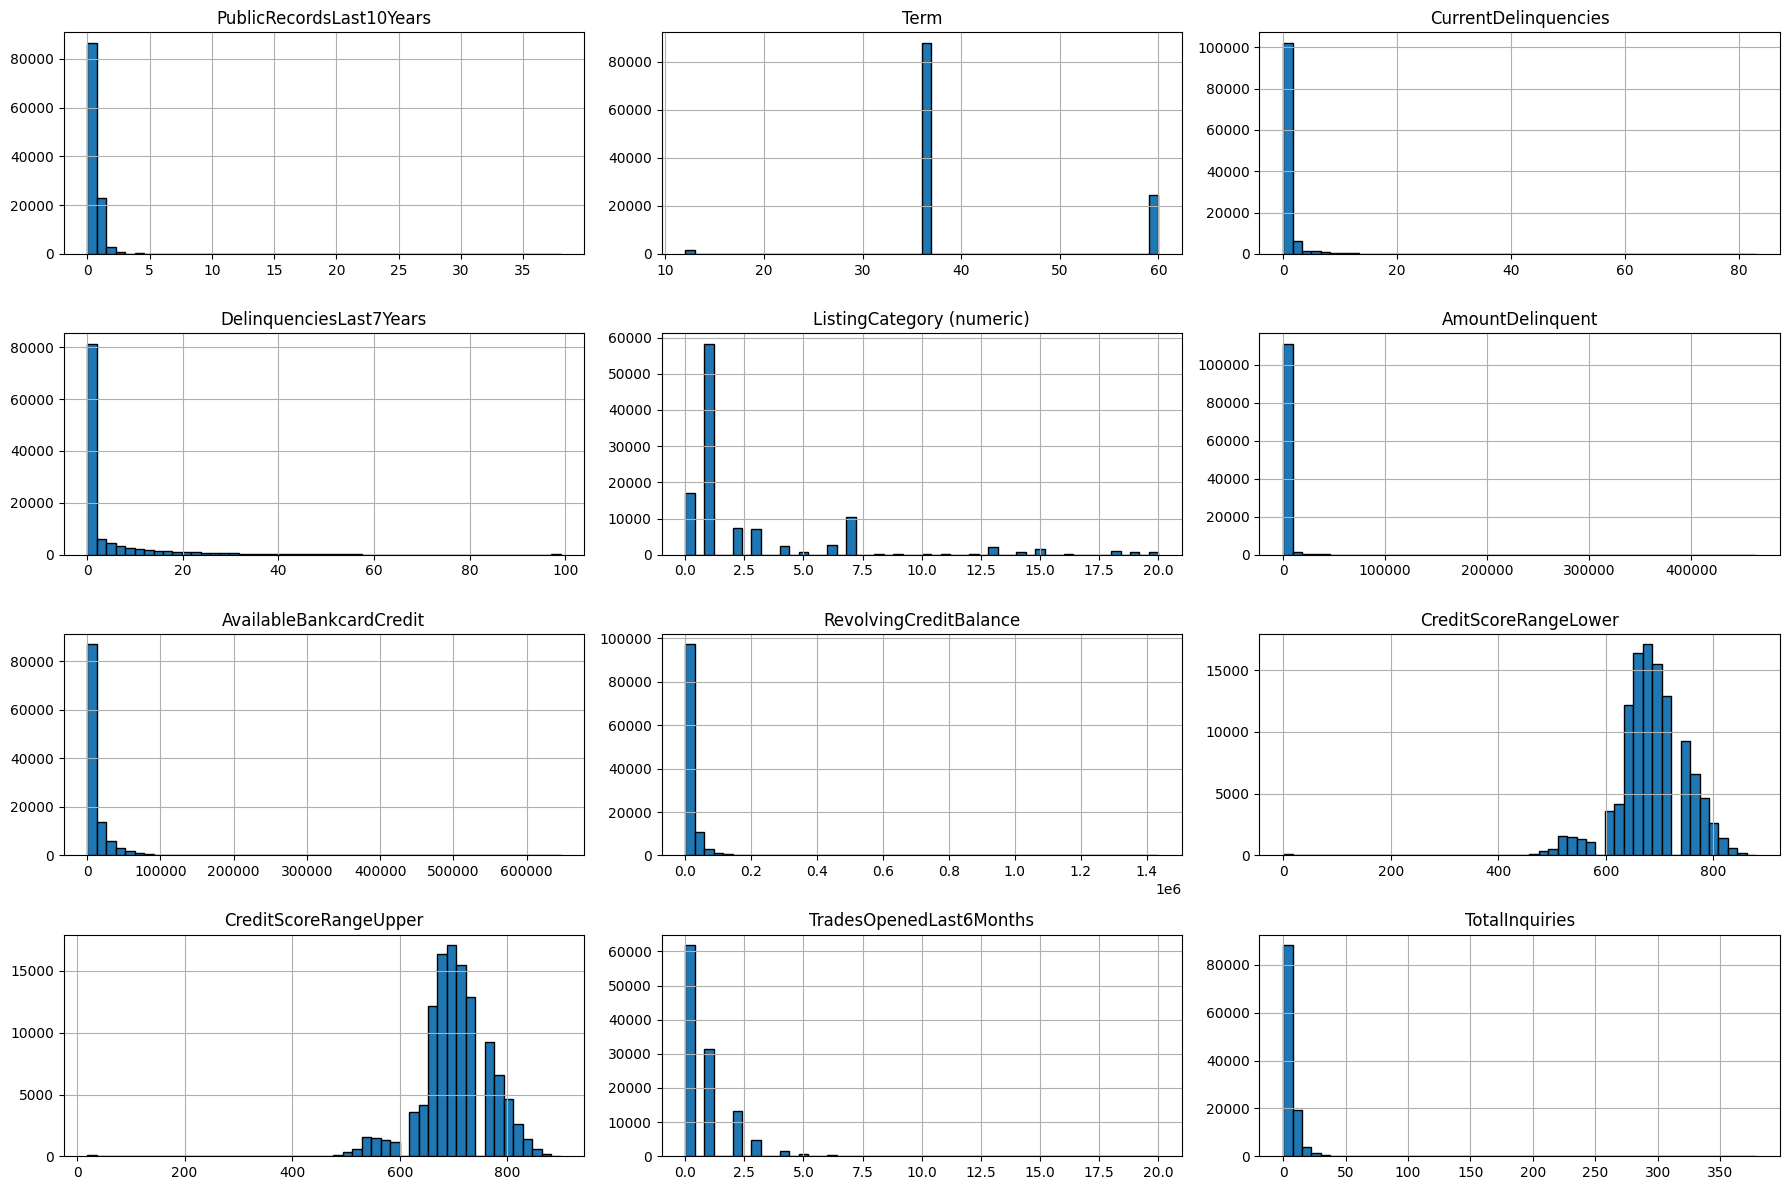

In [14]:
pp.plot_multiple_distributions(df, top_outlier_cols, bins=50, n_cols=3, figsize=(18, 12))